In [1]:
import numpy as np
from scipy import integrate, optimize
from numpy import exp
from scipy.optimize import curve_fit


def debay(temp, ylambd):
    def func(tem, const, theta):
        f = const * tem * (tem / theta) ** 3 * integrate.quad(lambda x: (x ** 3 / (exp(x) - 1)), 0.0, theta / tem)[0]
        return f

    constants = curve_fit(func, temp, ylambd)
    const_fit = constants[0][0]
    theta_fit = constants[0][1]

    fit_lambda = []
    for i in temp:
        fit_lambda.append(func(i, const_fit, theta_fit))
    return fit_lambda

In [2]:
debay([200], [0,1,2])

[0.9999999547931057]

In [3]:
import numpy as np
from scipy import integrate, optimize
import matplotlib.pyplot as plt

In [4]:
def Debye(n):
    
    def integrand(t):
        return t**n/(np.exp(t) - 1)
    
    @np.vectorize
    def function(x):
        return (n/x**n)*integrate.quad(integrand, 0, x)[0]
    
    return function

$$
f(x) = c_1 x D_3(x) = c_1 x \frac{n}{x^n} \int_0^x \frac{t^n}{e^t - 1}\,\mathrm{d}t \, , \quad x = \frac{T}{c_2}
$$

In [5]:
debye3 = Debye(3)
def objective(x, c, theta):
    return c*(x/theta)*debye3(x/theta)

In [6]:
np.random.seed(123)
T = np.linspace(200, 400, 21)
c1 = 1e-1
c2 = 298.15
sigma = 5e-4
f = objective(T, c1, c2)
data = f + sigma*np.random.randn(f.size)

In [7]:
params, covariance = optimize.curve_fit(objective, T, data, (0, 300))
params, covariance

(array([1.02509632e-01, 3.10534004e+02]),
 array([[1.85637330e-06, 9.46948796e-03],
        [9.46948796e-03, 4.92873904e+01]]))

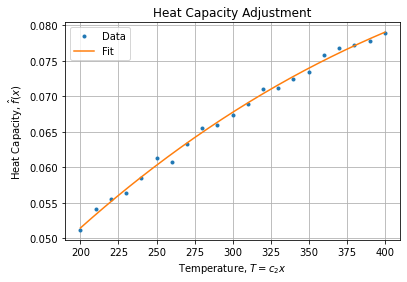

In [8]:
Tlin = np.linspace(200, 400, 201)
fhat = objective(Tlin, *params)

fig, axe = plt.subplots()
axe.plot(T, data, '.', label="Data")
axe.plot(Tlin, fhat, '-', label="Fit")
axe.set_title("Heat Capacity Adjustment")
axe.set_xlabel("Temperature, $T=c_2 x$")
axe.set_ylabel("Heat Capacity, $\hat{f}(x)$")
axe.legend()
axe.grid()

In [9]:
np.sqrt(covariance)

array([[1.36248791e-03, 9.73112941e-02],
       [9.73112941e-02, 7.02049787e+00]])